<a href="https://colab.research.google.com/github/Emma319/ML_Projects/blob/master/Cancer_Type_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gene Expression Data

This project is derived from cancer classification and prediction by gene 
expression at molecular level. 

The original data set of this project comes from a research study by Professor 
Golub. It described a generic method for automatically determining the type of 
cancer between acute myeloid leukemia (AML) and acute lymphocytic leukemia (ALL). The published paper showed the possibility of cancer classification based only on the gene expressions without relevant biological knowledge. 

The goal of the project is to find a better algorithm to classify cancer types between acute myeloid leukemia (AML) and acute lymphocytic leukemia (ALL). Better classification can provide useful information for medical staff to identify cancer. 

# **Machine Learning Workflow**

* Data Loading and Exploration
  * Data Loading
  * Exploratory Data Analysis
  * Data Cleaning and Pre-processing
* Feature Engineering and Data Transformation
  * Comparison of StandardScaler and MinMaxScaler
  * Normalization
  * Dimensionality reduction
* Training Model
  * Define and Create Estimator:
    * Benchmark Model
    * K-Means Clustering Model
    * Naive Bayes Model
    * K-Nearest Neighbors Model
    * Logistic Regression Model
    * Support Vector Machine Model
    * Gradient Boosting Model
  * Model tuning
  * Deploy the trained model
  * Evaluate the Performance
* Clean up Resources

---



In [ ]:
# data managing and display libs
import os
import io
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# sagemaker libraries
# import boto3
# import sagemaker

---
## **Data Loading and Exploration**

In [ ]:
# !wget https://www.kaggle.com/crawford/gene-expression/download/
!unzip data

Archive:  data.zip
   creating: data/
  inflating: data/actual.csv         
  inflating: data/data_set_ALL_AML_independent.csv  
  inflating: data/data_set_ALL_AML_train.csv  


### **Read in Data**

This gene expression dataset is provided by [Kaggle](https://www.kaggle.com/crawford/gene-expression/download). It contains three files which has been converted to comma separated value files `.csv`, which can read in using `pandas.**read_csv**`. 
1. `actual.csv`: each patients cancer type 
2. `data_set_ALL_AML_independent.csv`: test data 
3. `data_set_ALL_AML_train.csv`: training data

In [ ]:
patient_file='data/actual.csv'
test_file='data/data_set_ALL_AML_independent.csv'
train_file='data/data_set_ALL_AML_train.csv'

patient_data = pd.read_csv(patient_file)
test_data = pd.read_csv(test_file)
train_data = pd.read_csv(train_file)

print('Data read in.')

Data read in.


### **Exploratory Data Analysis (EDA)**

In [ ]:
# explore patient data
patient_data

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
...,...,...
67,68,ALL
68,69,ALL
69,70,ALL
70,71,ALL


In [ ]:
# print out some stats about the patient data
print('Patient Data - ')
print('\nNumber of patients: ', patient_data.shape[0])
print('Number of unique cancer types: ', (len(patient_data['cancer'].unique())))
labels = patient_data['cancer'].unique()
print('Unique cancel types: ', labels, '\n')
patient_data.groupby('cancer').size()

Patient Data - 

Number of patients:  72
Number of unique cancer types:  2
Unique cancel types:  ['ALL' 'AML'] 



cancer
ALL    47
AML    25
dtype: int64

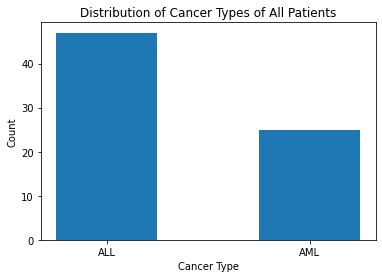

In [ ]:
plt.bar(labels, patient_data['cancer'].value_counts(), width=0.5)
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Distribution of Cancer Types of All Patients')
plt.show()

In [ ]:
# print out the first few rows of training data info
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,5,call.4,6,call.5,7,call.6,8,call.7,9,call.8,10,call.9,11,call.10,12,call.11,13,call.12,14,call.13,15,call.14,16,call.15,17,call.16,18,call.17,19,call.18,20,call.19,21,call.20,22,call.21,23,call.22,24,call.23,25,call.24,26,call.25,27,call.26,28,call.27,29,call.28,30,call.29,31,call.30,32,call.31,33,call.32,34,call.33,35,call.34,36,call.35,37,call.36,38,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,-106,A,-138,A,-72,A,-413,A,5,A,-88,A,-165,A,-67,A,-92,A,-113,A,-107,A,-117,A,-476,A,-81,A,-44,A,17,A,-144,A,-247,A,-74,A,-120,A,-81,A,-112,A,-273,A,-4,A,15,A,-318,A,-32,A,-124,A,-135,A,-20,A,7,A,-213,A,-25,A,-72,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,-125,A,-85,A,-144,A,-260,A,-127,A,-105,A,-155,A,-93,A,-119,A,-147,A,-72,A,-219,A,-213,A,-150,A,-51,A,-229,A,-199,A,-90,A,-321,A,-263,A,-150,A,-233,A,-327,A,-116,A,-114,A,-192,A,-49,A,-79,A,-186,A,-207,A,-100,A,-252,A,-20,A,-139,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,-76,A,215,A,238,A,7,A,106,A,42,A,-71,A,84,A,-31,A,-118,A,-126,A,-50,A,-18,A,-119,A,100,A,79,A,-157,A,-168,A,-11,A,-114,A,-85,A,-78,A,-76,A,-125,A,2,A,-95,A,49,A,-37,A,-70,A,-50,A,-57,A,136,A,124,A,-1,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,168,A,71,A,55,A,-2,A,268,A,219,M,82,A,25,A,173,A,243,M,149,A,257,A,301,A,78,A,207,A,218,A,132,A,-24,A,-36,A,255,A,316,A,54,A,81,A,241,A,193,A,312,A,230,P,330,A,337,A,101,A,132,A,318,A,325,A,392,P
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,-230,A,-272,A,-399,A,-541,A,-210,A,-178,A,-163,A,-179,A,-233,A,-127,A,-205,A,-218,A,-403,A,-152,A,-146,A,-262,A,-151,A,-308,A,-317,A,-342,A,-418,A,-244,A,-439,A,-191,A,-51,A,-139,A,-367,A,-188,A,-407,A,-369,A,-377,A,-209,A,-396,A,-324,A


In [ ]:
# print out some stats about the training data
print('Training Data - ')

print('\nrow: {}, column:{}'.format(*train_data.shape))
print('columns name:', train_data.columns)

print('\nNumber of unique Gene Description:', (len(train_data['Gene Description'].unique())))
print('Number of unique Gene Accession Number:', (len(train_data['Gene Accession Number'].unique())), '\n')

train_data.loc[:, ['Gene Description', 'Gene Accession Number']].describe()

Training Data - 

row: 7129, column:78
columns name: Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '28', 'call.27', '29', 'call.28', '30', 'call.29', '31', 'call.30',
       '32', 'call.31', '33', 'call.32', '34', 'call.33', '35', 'call.34',
       '36', 'call.35', '37', 'call.36', '38', 'call.37'],
      dtype='object')

Number of unique Gene Description: 6627
Number of unique Gene Accession Number: 7129 



,Gene Description,Gene Accession Number
count,7129,7129
unique,6627,7129
top,GB DEF = Unknown protein mRNA; partial cds,HG4316-HT4586_at
freq,7,1


In [ ]:
# print out the first few rows of test data info
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,41,call.2,42,call.3,43,call.4,44,call.5,45,call.6,46,call.7,47,call.8,48,call.9,49,call.10,50,call.11,51,call.12,52,call.13,53,call.14,54,call.15,55,call.16,56,call.17,57,call.18,58,call.19,59,call.20,60,call.21,61,call.22,62,call.23,63,call.24,64,call.25,65,call.26,66,call.27,67,call.28,68,call.29,69,call.30,70,call.31,71,call.32,72,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,-62,A,22,A,86,A,-146,A,-187,A,-56,A,-243,A,-130,A,-256,A,-118,A,-112,A,-21,A,-202,A,-90,A,-34,A,-95,A,-137,A,-157,A,-12,A,-172,A,-47,A,-176,A,-161,A,-48,A,-62,A,-58,A,-76,A,-154,A,-79,A,-55,A,-59,A,-131,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-23,A,-153,A,-36,A,-74,A,-187,A,-43,A,-218,A,-177,A,-249,A,-142,A,-185,A,-13,A,-274,A,-87,A,-144,A,-118,A,-51,A,-370,A,-172,A,-122,A,-442,A,-284,A,-215,A,-531,A,-198,A,-217,A,-98,A,-136,A,-118,A,-44,A,-114,A,-126,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,-7,A,17,A,-141,A,170,A,312,A,43,A,-163,A,-28,A,-410,A,212,A,24,A,8,A,59,A,102,A,-17,A,59,A,-82,A,-77,A,12,A,38,A,-21,A,-81,A,-46,A,-124,A,-5,A,63,A,-153,A,49,A,-30,A,12,A,23,A,-50,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,142,A,276,A,252,A,174,A,142,A,177,A,182,A,266,A,24,A,314,A,170,A,38,A,309,A,319,P,152,A,270,A,178,A,340,A,172,A,31,A,396,A,9,A,146,A,431,A,141,A,95,A,237,A,180,A,68,A,129,A,146,A,211,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-233,A,-211,A,-201,A,-32,A,114,A,-116,A,-289,A,-170,A,-535,A,-401,A,-197,A,-128,A,-456,A,-283,A,-174,A,-229,A,-135,A,-438,A,-137,A,-201,A,-351,A,-294,A,-172,A,-496,A,-256,A,-191,A,-215,A,-257,A,-110,A,-108,A,-171,A,-206,A


In [ ]:
# print out some stats about the test data
print('Test Data - ')

print('\nrow: {}, column:{}'.format(*test_data.shape))
print('columns name:', test_data.columns)

print('\nNumber of unique Gene Description:', (len(test_data['Gene Description'].unique())))
print('Number of unique Gene Accession Number:', (len(test_data['Gene Accession Number'].unique())), '\n')

test_data.loc[:, ['Gene Description', 'Gene Accession Number']].describe()

Test Data - 

row: 7129, column:70
columns name: Index(['Gene Description', 'Gene Accession Number', '39', 'call', '40',
       'call.1', '41', 'call.2', '42', 'call.3', '43', 'call.4', '44',
       'call.5', '45', 'call.6', '46', 'call.7', '47', 'call.8', '48',
       'call.9', '49', 'call.10', '50', 'call.11', '51', 'call.12', '52',
       'call.13', '53', 'call.14', '54', 'call.15', '55', 'call.16', '56',
       'call.17', '57', 'call.18', '58', 'call.19', '59', 'call.20', '60',
       'call.21', '61', 'call.22', '62', 'call.23', '63', 'call.24', '64',
       'call.25', '65', 'call.26', '66', 'call.27', '67', 'call.28', '68',
       'call.29', '69', 'call.30', '70', 'call.31', '71', 'call.32', '72',
       'call.33'],
      dtype='object')

Number of unique Gene Description: 6627
Number of unique Gene Accession Number: 7129 



,Gene Description,Gene Accession Number
count,7129,7129
unique,6627,7129
top,GB DEF = Unknown protein mRNA; partial cds,M83216_s_at
freq,7,1


### **Data Cleaning**

1. Delete all "calls" columns in the training data and test data.
2. Transpose the training and test dataframe.
3. Rename the Gene Accession Number columns to simplify the dataset.
4. Combine label and features


In [ ]:
def cleanData(data, patient_data, dataset):
  # Remove columns that contain 'call'
  col_drop = [col for col in data.columns if 'call' in col or 'Gene' in col]
  data_clean = data.drop(col_drop, axis=1, inplace=False)
  
  print('Cleaned Data - ')
  print('Number of columns:', len(data_clean.columns))
  print('Columns name:', data_clean.columns)

  # Transpose index and columns
  print('\nTranspose the dataframe - ')
  data_df = data_clean.T
  print('Shape:', data_df.shape)

  # Rename columns
  genes_total = len(data['Gene Accession Number'].unique())
  data_df.columns = ['gene_' + str(i) for i in range(1, genes_total+1)]

  # Rename index and combine label and features
  print('\nCombine label and feature - ')
  patient_data.index = patient_data['patient']
  if dataset == 'train':
    data_df.index = patient_data['patient'][:38]
    data_df = pd.concat([patient_data['cancer'][:38], data_df], axis=1)
  else:
    data_df.index = patient_data['patient'][38:]
    data_df = pd.concat([patient_data['cancer'][38:], data_df], axis=1)

  return data_df


In [ ]:
print('***Training Data shape:', train_data.shape)
train_clean = cleanData(train_data, patient_data, 'train')
print(train_clean.head())

print('\n\n***Test Data shape:', test_data.shape)
test_clean = cleanData(test_data, patient_data, 'test')
print(test_clean.head())

***Training Data shape: (7129, 78)
Cleaned Data - 
Number of columns: 38
Columns name: Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38'],
      dtype='object')

Transpose the dataframe - 
Shape: (38, 7129)

Combine label and feature - 
        cancer  gene_1  gene_2  ...  gene_7127  gene_7128  gene_7129
patient                         ...                                 
1          ALL    -214    -153  ...         36        191        -37
2          ALL    -139     -73  ...         11         76        -14
3          ALL     -76     -49  ...         41        228        -41
4          ALL    -135    -114  ...        -50        126        -91
5          ALL    -106    -125  ...         14         56        -25

[5 rows x 7130 columns]


***Test Data shape: (7129, 70)
Cleaned Data - 
Number of 

In [ ]:
train_clean

,cancer,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_7090,gene_7091,gene_7092,gene_7093,gene_7094,gene_7095,gene_7096,gene_7097,gene_7098,gene_7099,gene_7100,gene_7101,gene_7102,gene_7103,gene_7104,gene_7105,gene_7106,gene_7107,gene_7108,gene_7109,gene_7110,gene_7111,gene_7112,gene_7113,gene_7114,gene_7115,gene_7116,gene_7117,gene_7118,gene_7119,gene_7120,gene_7121,gene_7122,gene_7123,gene_7124,gene_7125,gene_7126,gene_7127,gene_7128,gene_7129
patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,ALL,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,ALL,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,ALL,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,ALL,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,ALL,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25
6,ALL,-138,-85,215,71,-272,-558,67,-186,87,193,325,-631,-625,-177,-94,222,-1,-140,34207,65,154,-49,-24,-72,39,-104,-40,40,46,-78,-273,-7,-618,-355,-344,-327,176,412,4148,...,209,-391,302,167,473,184,33638,27972,999,268,405,3632,4214,508,839,-311,46,199,-5,168,48,145,-209,147,376,252,384,-426,-2217,1157,115,1221,-76,172,-74,645,341,26,193,-53
7,ALL,-72,-144,238,55,-399,-551,131,-179,126,-20,-115,-1003,-761,-541,109,435,-129,-399,30801,43,80,-87,-8,-250,100,-73,-132,-57,-52,-73,-327,-28,-613,-317,-220,-179,58,383,21573,...,362,-618,379,280,351,211,20531,18708,1828,452,720,9542,7144,835,993,-361,-68,448,-16,317,67,36,546,304,243,349,312,-488,-2300,552,30,819,-178,151,-18,1140,482,10,369,-42
8,ALL,-413,-260,7,-2,-541,-790,-275,-463,70,-169,361,-1001,-520,-163,-38,281,-137,-247,25147,338,269,-116,46,-317,265,-130,-212,-233,29,-28,-599,73,-604,-226,-229,-163,257,580,3934,...,235,-1202,215,203,311,-443,17000,11531,848,293,607,15741,11441,1311,3406,-334,56,325,-29,272,106,172,133,428,103,283,445,-556,-3019,572,289,629,-86,302,23,1799,446,59,781,20
9,ALL,5,-127,106,268,-210,-535,0,-174,24,506,284,-829,-844,-230,292,172,-59,-323,15272,29,188,-69,74,-217,106,-159,-155,-101,143,-4,-283,47,-383,-196,-106,-100,166,752,13005,...,285,-821,752,182,642,-153,22307,15594,932,437,467,7641,6286,345,1098,-242,-58,293,6,239,-4,143,-129,359,368,292,585,-349,-1439,1776,356,980,6,177,-12,758,385,115,244,-39


In [ ]:
test_clean

,cancer,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_7090,gene_7091,gene_7092,gene_7093,gene_7094,gene_7095,gene_7096,gene_7097,gene_7098,gene_7099,gene_7100,gene_7101,gene_7102,gene_7103,gene_7104,gene_7105,gene_7106,gene_7107,gene_7108,gene_7109,gene_7110,gene_7111,gene_7112,gene_7113,gene_7114,gene_7115,gene_7116,gene_7117,gene_7118,gene_7119,gene_7120,gene_7121,gene_7122,gene_7123,gene_7124,gene_7125,gene_7126,gene_7127,gene_7128,gene_7129
patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39,ALL,-342,-200,41,328,-224,-427,-656,-292,137,-144,48,-591,-622,-342,294,241,-7,-108,45815,57,422,-185,-48,-181,-4,-132,-2,115,41,-50,-202,113,-557,-687,-289,-195,135,267,57,...,429,-605,-2,603,381,2435,20818,12869,835,388,-118,16456,12103,451,3239,-352,41,547,-50,156,41,19,323,420,231,246,533,-101,-451,2112,277,1023,67,214,-135,1074,475,48,168,-70
40,ALL,-87,-248,262,295,-226,-493,367,-452,194,162,207,-960,-622,175,171,-71,-163,-445,20958,21,137,-83,30,81,300,-76,-234,-49,24,-52,-370,-35,-616,-409,-417,-589,96,373,-175,...,111,-644,117,-96,288,-23,9499,17954,569,276,-229,18764,10349,204,9883,-304,-109,383,-13,303,117,87,-142,212,5,325,80,-518,-2406,1323,83,529,-295,352,-67,67,263,-33,-33,-21
41,ALL,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,-89,-355,-173,-165,-139,144,-111,-161,28991,67,32,21,-43,-103,26,-86,-137,-68,-10,-29,-167,-62,-262,-189,-158,-56,14,165,104,...,173,-469,222,192,223,469,14173,20265,646,42,51,7299,4895,-291,831,-187,37,161,-64,57,26,86,-266,84,10,57,300,-148,-577,1033,129,383,46,104,15,245,164,84,100,-18
42,ALL,22,-153,17,276,-211,-250,55,-141,0,500,58,-517,-24,-99,13,-77,-182,-150,25880,41,70,-12,37,-15,49,-52,-120,-23,-37,-70,-254,51,-340,-149,-153,-124,194,532,-55,...,186,-770,478,374,363,547,20485,17102,1383,96,189,16180,19089,6,1038,-131,37,355,15,179,87,77,192,235,95,189,243,-189,-3710,826,413,399,16,558,24,893,297,6,1971,-42
43,ALL,86,-36,-141,252,-201,-384,-420,-197,-60,-468,182,-322,-319,-137,144,-100,-201,-408,42401,9,274,-26,31,-93,115,-84,-228,-12,38,-74,-377,21,-673,-353,-372,-312,-31,331,307,...,129,-557,-26,281,139,1144,16751,20779,406,21,-254,6965,6634,-509,1314,-302,64,197,-185,45,-74,26,-235,218,249,180,163,-341,-2651,937,341,91,-84,615,-52,1235,9,7,1545,-81
44,ALL,-146,-74,170,174,-32,-318,8,-152,-148,17,-100,-373,-139,-234,-103,65,117,-94,27924,-807,-355,-41,7,-1700,-2658,-207,-256,103,-59,-90,-249,-51,-3006,-1899,-1725,-1694,126,321,223,...,191,-280,171,295,213,1119,20648,21288,861,60,137,13668,14143,211,6035,-204,140,210,45,109,32,53,179,254,157,195,186,-71,-266,1691,180,690,-142,249,-220,354,-42,-100,45,-108
45,ALL,-187,-187,312,142,114,-148,-184,-133,12,97,-83,-375,-426,-187,23,-34,25,-171,21229,-774,-286,-54,112,-664,-1383,-208,-178,431,-44,-78,-262,-53,-2939,-1534,-1573,-1365,77,341,-115,...,80,-286,287,126,174,2942,14065,17303,365,3,88,9530,11601,7,1854,-200,8,244,-4,108,26,26,-202,126,59,159,167,-133,-676,479,37,125,-185,13,-148,304,-1,-207,112,-190
46,ALL,-56,-43,43,177,-116,-184,-105,-62,0,-40,30,-436,-171,-176,-77,49,7,-70,29189,14,88,-93,2,-137,-99,-127,33,171,-69,-33,-122,-23,-238,-141,-137,134,173,316,291,...,190,-529,203,127,235,3972,14440,21449,732,128,-112,21379,18125,141,3899,-216,75,284,50,33,50,5,5,76,79,111,288,36,-599,438,103,593,0,-24,18,625,173,63,63,-62
47,ALL,-243,-218,-163,182,-289,-268,-285,-172,52,-134,-140,-321,-439,-149,-56,117,-31,-243,41275,84,178,-172,-14,-271,73,18,-2,16,-23,102,18,8,-462,-212,-191,52,203,1466,-18,...,172,-224,58,271,205,317,11122,17048,199,147,27,10313,8428,199,3242,-69,8,121,-39,18,-54,-6,-197,262,-16,23,168,-180,-1460,613,174,277,6,81,2,722,170,0,510,-73


### **Visualize the distribution of cancer types**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
 
def display_distribution(labels, train_Data, test_Data):
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, train_Data, width, label='Training Data')
  rects2 = ax.bar(x + width/2, test_Data, width, label='Test Data')

  # Add text for labels, title and x-axis tick labels
  ax.set_ylabel('Count')
  ax.set_title('Distribution of Cancer Types')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')
        
  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()
  plt.show()

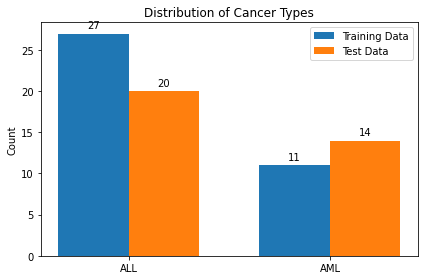

In [ ]:
display_distribution(labels, train_clean['cancer'].value_counts(), test_clean['cancer'].value_counts())

Create a gene dataset containing all training and test data for further analysis.

In [ ]:
# combine training data and test data
gene_clean = train_clean.append(test_clean)
gene_clean

,cancer,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_7090,gene_7091,gene_7092,gene_7093,gene_7094,gene_7095,gene_7096,gene_7097,gene_7098,gene_7099,gene_7100,gene_7101,gene_7102,gene_7103,gene_7104,gene_7105,gene_7106,gene_7107,gene_7108,gene_7109,gene_7110,gene_7111,gene_7112,gene_7113,gene_7114,gene_7115,gene_7116,gene_7117,gene_7118,gene_7119,gene_7120,gene_7121,gene_7122,gene_7123,gene_7124,gene_7125,gene_7126,gene_7127,gene_7128,gene_7129
patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,ALL,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,ALL,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,ALL,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,ALL,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,ALL,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,ALL,-154,-136,49,180,-257,-273,141,-123,52,878,-51,-592,-219,-149,-76,391,-11,-190,19457,105,241,-4,43,-44,171,5,-99,-14,80,-49,-138,51,-490,-101,-117,-1122,185,694,32,...,188,-798,619,115,343,866,19394,16120,621,244,52,12712,9978,-27,2758,-161,172,206,67,215,35,40,-111,206,60,165,135,30,-444,1088,214,540,13,1075,-45,524,249,40,-68,-1
69,ALL,-79,-118,-30,68,-110,-264,-28,-61,40,-217,-52,-247,-454,-11,187,154,0,-322,17499,-5,135,-170,11,-144,123,-101,-154,44,6,-37,-265,112,-313,-181,-22,607,582,1512,53,...,217,-255,420,375,563,501,18295,13564,554,164,113,12952,13480,365,1451,-105,57,242,20,174,57,453,65,291,11,143,251,-75,97,1187,409,617,-34,738,11,742,234,72,109,-30
70,ALL,-55,-44,12,129,-108,-301,-222,-133,136,320,81,-518,-168,-102,57,105,-61,-167,29906,10,-12,-111,78,-194,-52,-80,-71,-17,-61,-103,-179,-12,-508,-199,-167,-117,146,286,8378,...,162,-366,131,201,153,1237,11534,14085,1106,266,216,5754,5346,179,798,-143,78,255,-23,15,44,20,199,83,49,151,162,-225,-1048,1002,131,318,35,241,-66,320,174,-4,176,40


Visualize the distribution of cancer types

cancer
ALL    47
AML    25
dtype: int64


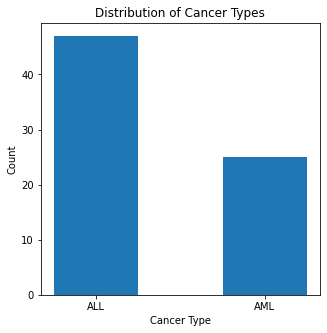

In [ ]:
print(gene_clean.groupby('cancer').size())

plt.figure(figsize=(5,5))
plt.bar(labels, gene_clean['cancer'].value_counts(), width=0.5)
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Distribution of Cancer Types')
plt.show()

Create 'gene.csv' file and save it in a local directory.

In [ ]:
data_dir = 'gene_data'
gene_file = 'gene.csv' 

# make data dir, if it does not exist
if not os.path.exists(data_dir):
  os.makedirs(data_dir)

# save gene data to csv file
gene_clean.to_csv(os.path.join(data_dir, gene_file), header=False, index=False)

# print statement indicates that the file has saved
print('Path created: ' + str(data_dir) + '/' + str(gene_file))

Path created: gene_data/gene.csv


---
## **Feature Engineering and Data Transformation**

**Read in Data**

In [ ]:
# data managing and display libs
import os
import io
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# read in data
data_dir = 'gene_data'
gene_file = 'gene.csv' 
col_numbers = ['cancer'] + ['gene_' + str(i) for i in range(1, 7130)]
gene_data = pd.read_csv(os.path.join(data_dir, gene_file), header=None, names=col_numbers, index_col=False)

print('Gene dataset shape:', gene_data.shape)
# gene_data

Gene dataset shape: (72, 7130)


#### **Comparison of original data and standardized data**

Given the high dimensionality of the dataset, a small sample is used to compare the original data and the standardized data.

In [ ]:
sample = gene_data.sample(n=100, axis=1)
sample.describe().round(2)

,gene_5112,gene_740,gene_6958,gene_2410,gene_6123,gene_5893,gene_1330,gene_4573,gene_6778,gene_4961,gene_5999,gene_6093,gene_5957,gene_1874,gene_1048,gene_7038,gene_6853,gene_4245,gene_5581,gene_5237,gene_2889,gene_3465,gene_6962,gene_2309,gene_4693,gene_5183,gene_2037,gene_5301,gene_2237,gene_1528,gene_3899,gene_3629,gene_5491,gene_6308,gene_5668,gene_4526,gene_450,gene_2991,gene_6301,gene_6187,...,gene_6241,gene_4751,gene_5833,gene_1236,gene_4294,gene_2091,gene_1380,gene_5457,gene_5219,gene_3012,gene_271,gene_2996,gene_6618,gene_4372,gene_1424,gene_1563,gene_1544,gene_6012,gene_658,gene_1360,gene_6448,gene_517,gene_6342,gene_794,gene_3177,gene_6728,gene_6463,gene_3163,gene_6574,gene_1822,gene_2580,gene_2172,gene_6810,gene_2551,gene_3189,gene_1242,gene_5321,gene_6442,gene_337,gene_2033
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,...,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,54.79,105.65,66.62,-66.76,510.14,162.68,153.72,277.42,-1015.14,270.96,18.22,-227.90,283.35,123.51,68.72,1493.38,318.57,23.61,-15.14,14581.82,448.07,326.75,32.89,549.06,-33.24,2575.85,53.56,1116.33,586.67,1308.60,165.81,427.88,-61.22,581.00,349.42,678.64,1225.11,292.53,76.75,62.11,...,-46.43,-398.07,22.74,-267.31,342.53,290.82,1213.21,108.32,-15.08,650.92,-265.86,595.54,4502.86,95.50,122.24,35.97,69.58,246.64,159.33,40.15,-139.93,1165.46,212.32,1732.53,711.62,407.29,53.49,636.83,15488.60,1333.40,336.46,355.75,138.62,34.86,218.01,255.75,447.47,254.35,261.65,-243.99
std,186.14,76.95,111.33,117.84,199.68,80.47,103.99,143.83,660.33,134.93,65.71,137.46,131.00,176.78,104.08,582.94,163.10,202.86,79.30,2804.97,203.13,141.25,64.22,772.38,45.19,1813.27,58.01,751.20,398.69,458.92,86.59,193.11,49.21,1675.02,186.21,241.21,492.35,164.04,90.76,114.85,...,63.25,225.01,466.24,293.76,191.54,751.53,574.38,130.08,40.74,499.09,215.30,226.82,1919.67,189.47,74.36,46.71,290.37,330.00,324.00,89.18,156.49,714.00,340.18,821.02,366.10,233.94,160.94,643.28,3034.43,866.77,141.92,133.79,232.32,51.50,390.89,183.76,249.09,150.65,335.00,443.77
min,-422.00,-32.00,-249.00,-310.00,191.00,2.00,-28.00,-58.00,-3047.00,56.00,-153.00,-567.00,29.00,-341.00,-267.00,-298.00,-28.00,-112.00,-177.00,7906.00,86.00,94.00,-139.00,-921.00,-138.00,449.00,-54.00,229.00,-63.00,56.00,21.00,43.00,-183.00,-277.00,112.00,237.00,589.00,17.00,-120.00,-299.00,...,-185.00,-883.00,-890.00,-994.00,32.00,-384.00,308.00,-188.00,-118.00,-199.00,-925.00,192.00,1233.00,-162.00,-44.00,-50.00,-346.00,-292.00,-199.00,-186.00,-587.00,-65.00,-809.00,591.00,41.00,-137.00,-253.00,3.00,717.00,135.00,29.00,110.00,-314.00,-96.00,-106.00,-53.00,89.00,31.00,-402.00,-1583.00
25%,-31.25,52.00,3.75,-137.25,377.50,113.50,82.00,165.00,-1233.25,184.50,-29.25,-337.00,191.50,12.75,9.50,1130.75,222.75,-29.25,-63.50,12737.75,299.00,219.00,-7.75,5.50,-58.00,1466.75,12.75,634.00,324.00,1058.00,104.75,319.75,-98.25,-30.50,228.75,494.50,875.75,182.75,18.75,-6.25,...,-90.00,-542.75,-269.25,-423.25,199.75,-74.50,767.75,23.00,-38.00,361.00,-375.25,446.00,3140.00,-19.50,70.75,-3.25,-26.50,49.25,-14.00,-15.25,-250.25,677.75,95.50,1130.50,478.50,250.50,-56.75,225.50,14424.00,786.00,240.75,275.25,1.50,4.75,3.25,159.50,289.25,168.75,23.75,-516.75
50%,14.00,99.50,70.50,-55.00,447.50,158.00,150.00,263.50,-981.00,265.00,17.00,-222.00,286.00,114.00,84.50,1408.00,289.00,-7.00,-11.00,14032.00,412.00,296.50,27.00,545.00,-28.50,2221.50,43.50,782.00,527.00,1307.00,162.50,409.00,-64.50,53.00,305.00,651.00,1103.00,251.50,65.50,51.50,...,-38.50,-367.50,-37.00,-272.50,319.50,56.00,1179.50,92.00,-15.00,595.00,-256.50,570.50,4142.00,39.50,115.00,34.50,10.50,185.50,61.00,17.50,

Scikit-learn preprocessing module: StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

sample_scaled = pd.DataFrame(StandardScaler().fit_transform(sample))
sample_scaled.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,...,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,...,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-2.58,-1.80,-2.86,-2.08,-1.61,-2.01,-1.76,-2.35,-3.10,-1.60,-2.62,-2.48,-1.96,-2.65,-3.25,-3.09,-2.14,-0.67,-2.06,-2.40,-1.79,-1.66,-2.70,-1.92,-2.33,-1.18,-1.87,-1.19,-1.64,-2.75,-1.68,-2.01,-2.49,-0.52,-1.28,-1.84,-1.30,-1.69,-2.18,-3.17,...,-2.21,-2.17,-1.97,-2.49,-1.63,-0.90,-1.59,-2.29,-2.54,-1.71,-3.08,-1.79,-1.72,-1.37,-2.25,-1.85,-1.44,-1.64,-1.11,-2.55,-2.88,-1.74,-3.02,-1.40,-1.84,-2.34,-1.92,-0.99,-4.90,-1.39,-2.18,-1.85,-1.96,-2.56,-0.83,-1.69,-1.45,-1.49,-1.99,-3.04
25%,-0.47,-0.70,-0.57,-0.60,-0.67,-0.62,-0.69,-0.79,-0.33,-0.65,-0.73,-0.80,-0.71,-0.63,-0.57,-0.63,-0.59,-0.26,-0.61,-0.66,-0.74,-0.77,-0.64,-0.71,-0.55,-0.62,-0.71,-0.65,-0.66,-0.55,-0.71,-0.56,-0.76,-0.37,-0.65,-0.77,-0.71,-0.67,-0.64,-0.60,...,-0.69,-0.65,-0.63,-0.53,-0.75,-0.49,-0.78,-0.66,-0.57,-0.58,-0.51,-0.66,-0.71,-0.61,-0.70,-0.85,-0.33,-0.60,-0.54,-0.63,-0.71,-0.69,-0.35,-0.74,-0.64,-0.67,-0.69,-0.64,-0.35,-0.64,-0.68,-0.61,-0.59,-0.59,-0.55,-0.53,-0.64,-0.57,-0.72,-0.62
50%,-0.22,-0.08,0.04,0.10,-0.32,-0.06,-0.04,-0.10,0.05,-0.04,-0.02,0.04,0.02,-0.05,0.15,-0.15,-0.18,-0.15,0.05,-0.20,-0.18,-0.22,-0.09,-0.01,0.11,-0.20,-0.17,-0.45,-0.15,-0.00,-0.04,-0.10,-0.07,-0.32,-0.24,-0.12,-0.25,-0.25,-0.12,-0.09,...,0.13,0.14,-0.13,-0.02,-0.12,-0.31,-0.06,-0.13,0.00,-0.11,0.04,-0.11,-0.19,-0.30,-0.10,-0.03,-0.20,-0.19,-0.31,-0.26,0.01,-0.17,-0.07,-0.13,-0.22,-0.06,-0.12,-0.34,0.11,-0.30,-0.12,-0.18,-0.19,-0.05,-0.49,-0.17,-0.26,-0.24,-0.12,0.00
75%,0.24,0.44,0.56,0.50,0.53,0.57,0.46,0.71,0.46,0.47,0.63,0.70,0.62,0.57,0.68,0.68,0.49,-0.02,0.44,0.56,0.46,0.53,0.46,0.44,0.63,0.31,0.64,0.39,0.31,0.60,0.49,0.29,0.75,-0.21,0.32,0.59,0.54,0.50,0.56,0.44,...,0.52,0.82,0.36,0.63,0.65,0.02,0.45,0.56,0.70,0.43,0.65,0.88,0.52,0.43,0.60,0.74,-0.04,0.23,0.23,0.59,0.54,0.36,0.44,0.37,0.53,0.56,0.56,0.27,0.42,0.38,0.51,0.49,0.20,0.55,0.17,0.28,0.38,0.41,0.62,0.56
max,4.17,3.32,2.49,2.31,3.77,3.15,3.84,2.36,2.43,4.99,2.33,2.93,2.36,2.84,1.91,1.94,3.55,8.09,4.26,2.82,2.84,3.28,4.97,3.12,2.43,5.07,2.65,3.49,3.60,3.25,2.92,4.22,3.03,5.61,3.57,2.55,3.26,2.67,3.39,3.82,...,3.64,1.86,3.74,2.27,2.91,4.78,3.94,2.55,2.94,4.30,2.28,2.12,3.68,4.17,2.65,2.33,5.90,3.42,5.66,2.55,3.27,4.00,4.33,2.63,3.13,3.62,3.48,4.97,2.49,3.69,2.67,3.67,4.09,2.33,3.46,6.24,3.79,4.35,2.72,2.27


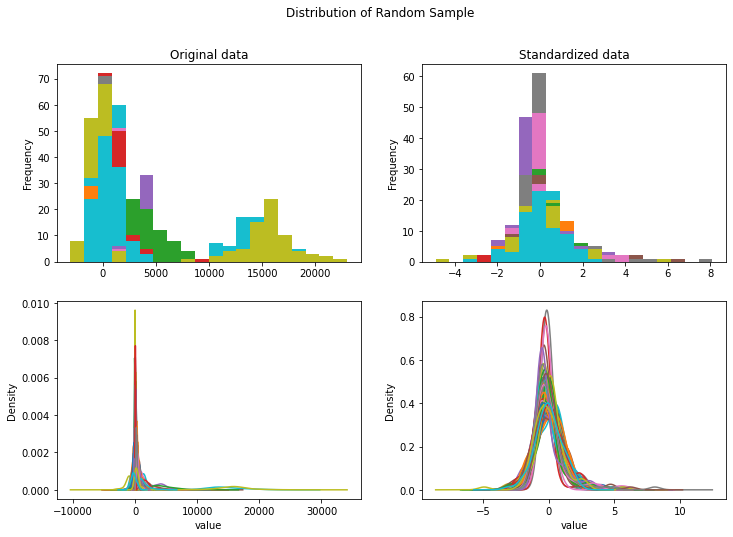

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sample.plot(kind="hist", bins=20, legend=None, ax=axs[0, 0])
sample.plot(kind="density", legend=None, ax=axs[1, 0])
sample_scaled.plot(kind="hist", bins=20, legend=None, ax=axs[0, 1])
sample_scaled.plot(kind="density", legend=None, ax=axs[1, 1])

axs[0, 0].set_title('Original data')
axs[1, 0].set_xlabel('value')
axs[0, 1].set_title('Standardized data')
axs[1, 1].set_xlabel('value')

fig.suptitle('Distribution of Random Sample - StandardScaler')
plt.show()

Scikit-learn preprocessing module: MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sample_normal = pd.DataFrame(MinMaxScaler().fit_transform(sample))
sample_normal.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,...,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,0.38,0.35,0.53,0.47,0.30,0.39,0.31,0.50,0.56,0.24,0.53,0.46,0.45,0.48,0.63,0.61,0.38,0.08,0.33,0.46,0.39,0.34,0.35,0.38,0.49,0.19,0.41,0.25,0.31,0.46,0.37,0.32,0.45,0.08,0.26,0.42,0.29,0.39,0.39,0.45,...,0.38,0.54,0.34,0.52,0.36,0.16,0.29,0.47,0.46,0.28,0.58,0.46,0.32,0.25,0.46,0.44,0.20,0.32,0.16,0.50,0.47,0.30,0.41,0.35,0.37,0.39,0.36,0.17,0.66,0.27,0.45,0.34,0.32,0.52,0.19,0.21,0.28,0.26,0.42,0.57
std,0.15,0.20,0.19,0.23,0.19,0.20,0.18,0.21,0.18,0.15,0.20,0.19,0.23,0.18,0.20,0.20,0.18,0.11,0.16,0.19,0.22,0.20,0.13,0.20,0.21,0.16,0.22,0.22,0.19,0.17,0.22,0.16,0.18,0.16,0.21,0.23,0.22,0.23,0.18,0.14,...,0.17,0.25,0.18,0.21,0.22,0.18,0.18,0.21,0.18,0.17,0.19,0.26,0.19,0.18,0.21,0.24,0.14,0.20,0.15,0.20,0.16,0.18,0.14,0.25,0.20,0.17,0.19,0.17,0.14,0.20,0.21,0.18,0.17,0.21,0.23,0.13,0.19,0.17,0.21,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.31,0.21,0.43,0.34,0.17,0.27,0.19,0.33,0.50,0.15,0.38,0.31,0.29,0.37,0.52,0.49,0.27,0.05,0.23,0.33,0.23,0.18,0.27,0.24,0.37,0.09,0.26,0.12,0.19,0.37,0.21,0.23,0.31,0.02,0.13,0.24,0.13,0.23,0.28,0.37,...,0.26,0.38,0.23,0.41,0.19,0.07,0.15,0.34,0.36,0.19,0.48,0.29,0.19,0.14,0.32,0.24,0.15,0.21,0.08,0.38,0.35,0.18,0.36,0.16,0.24,0.28,0.23,0.06,0.62,0.15,0.31,0.23,0.23,0.40,0.07,0.15,0.15,0.16,0.27,0.46
50%,0.35,0.34,0.54,0.50,0.24,0.38,0.31,0.48,0.57,0.24,0.53,0.47,0.46,0.47,0.66,0.59,0.34,0.06,0.33,0.42,0.35,0.29,0.34,0.38,0.51,0.16,0.38,0.16,0.28,0.46,0.36,0.31,0.44,0.03,0.22,0.39,0.23,0.33,0.37,0.44,...,0.40,0.57,0.32,0.52,0.33,0.10,0.28,0.45,0.46,0.27,0.58,0.43,0.28,0.19,0.44,0.44,0.17,0.29,0.12,0.45,0.47,0.27,0.40,0.31,0.33,0.38,0.33,0.11,0.68,0.21,0.42,0.30,0.29,0.51,0.08,0.19,0.23,0.22,0.40,0.57
75%,0.42,0.44,0.64,0.59,0.40,0.50,0.40,0.65,0.64,0.32,0.66,0.59,0.60,0.59,0.76,0.75,0.46,0.07,0.39,0.57,0.49,0.44,0.41,0.47,0.62,0.24,0.55,0.34,0.37,0.56,0.47,0.37,0.59,0.05,0.33,0.55,0.40,0.50,0.49,0.52,...,0.47,0.74,0.41,0.65,0.50,0.16,0.37,0.59,0.59,0.36,0.70,0.68,0.41,0.32,0.58,0.62,0.19,0.37,0.20,0.62,0.56,0.37,0.47,0.44,0.48,0.49,0.46,0.21,0.72,0.35,0.55,0.42,0.36,0.64,0.23,0.25,0.35,0.32,0.55,0.68
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


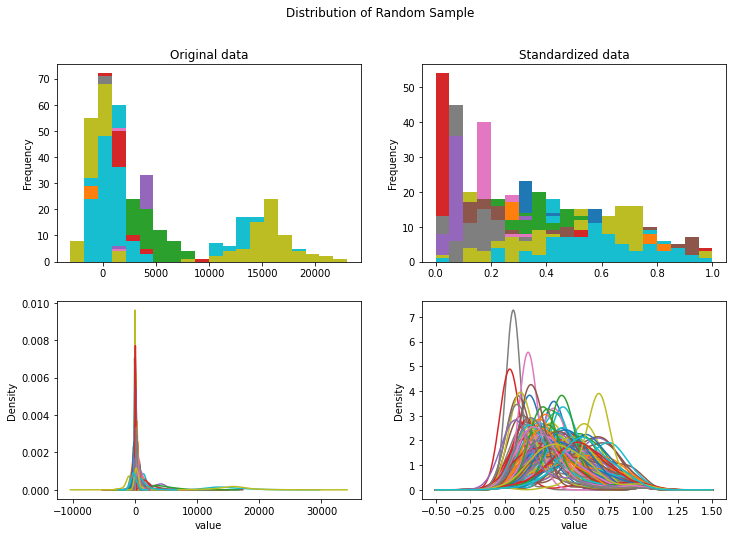

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sample.plot(kind="hist", bins=20, legend=None, ax=axs[0, 0])
sample.plot(kind="density", legend=None, ax=axs[1, 0])
sample_normal.plot(kind="hist", bins=20, legend=None, ax=axs[0, 1])
sample_normal.plot(kind="density", legend=None, ax=axs[1, 1])

axs[0, 0].set_title('Original data')
axs[1, 0].set_xlabel('value')
axs[0, 1].set_title('Standardized data')
axs[1, 1].set_xlabel('value')

fig.suptitle('Distribution of Random Sample - MinMaxScaler')
plt.show()

### **Standardization**
 
Use Scikit-learn StandardScaler method to standardize the numerical features by removing the mean and scaling to unit variance.

Standardization of a dataset is a common requirement for many machine learning estimators.

> The standard score of a sample x is calculated as:
>
> z = (x - u) / s
>
> where u is the mean of the training samples, and s is the standard deviation of the training samples.

In [ ]:
train_x = gene_data.iloc[:38, 1:]
train_y = gene_data.iloc[:38, :1].replace({'ALL':0,'AML':1})
test_x = gene_data.iloc[38:, 1:]
test_y = gene_data.iloc[38:, :1].replace({'ALL':0,'AML':1})

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x.reset_index(drop=True).astype(float)))
test_x_scaled = pd.DataFrame(scaler.transform(test_x.reset_index(drop=True).astype(float)))

# get same features and indices
train_x_scaled.columns=train_x.columns
# train_x_scaled.index=train_x.index

test_x_scaled.columns=test_x.columns
# test_x_scaled.index=test_x.index

In [ ]:
# standardize whole gene dataset
gene_clean_df = gene_data.drop('cancer', axis=1).reset_index(drop=True)
gene_scaled = pd.DataFrame(scaler.transform(gene_clean_df.astype(float)))

# get same features and indices
gene_scaled.columns = gene_clean_df.columns
# gene_scaled.index = gene_clean_df.index

print(gene_scaled.shape, '\nGene scaled dataset:')
gene_scaled.head().round(2)

(72, 7129) 
Gene scaled dataset:


,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,gene_40,...,gene_7090,gene_7091,gene_7092,gene_7093,gene_7094,gene_7095,gene_7096,gene_7097,gene_7098,gene_7099,gene_7100,gene_7101,gene_7102,gene_7103,gene_7104,gene_7105,gene_7106,gene_7107,gene_7108,gene_7109,gene_7110,gene_7111,gene_7112,gene_7113,gene_7114,gene_7115,gene_7116,gene_7117,gene_7118,gene_7119,gene_7120,gene_7121,gene_7122,gene_7123,gene_7124,gene_7125,gene_7126,gene_7127,gene_7128,gene_7129
0,-0.86,-0.03,-0.35,-0.81,-0.17,-0.89,1.12,0.28,1.86,0.45,-0.66,-0.56,-0.74,-2.17,-0.26,1.46,-0.68,-1.17,-0.70,-0.28,1.40,-2.28,0.05,0.42,0.94,0.30,-1.22,0.56,-0.79,-1.48,-0.77,-0.89,1.33,-0.76,0.73,-0.03,0.00,0.04,1.85,1.75,...,1.25,-0.61,-0.44,-0.23,-0.35,0.70,0.56,-0.59,-0.42,0.65,0.30,1.11,0.47,0.96,0.14,-1.00,-1.18,0.14,-1.14,0.06,-1.48,0.57,0.25,0.65,-0.55,0.58,0.29,-0.20,-0.16,0.83,0.07,-0.82,-1.76,-0.02,-0.41,-0.16,-0.03,0.55,-0.44,-0.26
1,-0.17,1.04,0.14,0.88,0.11,0.29,-1.32,0.37,0.02,-0.18,-0.29,-0.18,1.17,0.90,0.53,-0.20,-1.01,-0.42,-1.24,0.10,-0.36,-1.10,-1.05,-0.26,-0.90,-0.63,1.21,1.61,0.71,-0.01,-0.45,-0.89,-1.44,-0.20,0.11,-0.50,-0.32,-0.46,-0.63,-0.60,...,-0.70,0.64,-0.52,-0.05,0.23,0.59,0.54,-0.24,-0.49,-0.77,-1.31,0.89,0.70,-1.01,-0.47,0.42,-1.50,-0.16,0.45,-0.26,0.06,3.75,-1.11,-0.42,-1.27,-0.84,-0.61,-0.38,-0.76,-0.46,-0.12,0.29,-0.59,0.09,0.07,-0.18,-0.20,-0.27,-0.60,0.50
2,0.42,1.36,-2.50,1.10,-0.91,-1.58,0.35,-1.85,1.30,-1.57,-0.29,-1.87,-2.16,-0.31,0.73,1.85,2.23,-0.83,-0.48,1.92,2.07,-2.11,1.26,-0.48,1.86,-0.72,-0.47,0.67,-0.04,-0.83,-1.78,-1.34,-0.45,-0.35,0.53,0.24,0.84,0.97,0.27,0.17,...,1.20,-0.17,-0.41,-0.15,1.22,1.07,1.10,0.35,1.89,0.45,0.62,-1.13,-1.02,1.28,-0.72,-0.29,-0.03,-0.53,-0.95,0.64,0.91,1.14,-0.02,1.56,3.12,0.20,2.26,0.42,-0.10,-0.29,1.63,1.52,0.32,-0.50,1.72,0.57,2.13,0.71,-0.38,-0.39
3,-0.13,0.49,2.43,-1.46,-1.30,-1.09,0.93,-0.58,-0.61,-0.39,1.78,-1.00,-0.39,-0.16,0.24,0.62,-0.52,1.26,-0.61,0.20,0.97,1.15,0.63,0.93,1.97,-0.54,-1.29,0.45,0.22,-0.67,0.34,-0.74,-0.06,-0.23,-1.19,-0.34,-0.19,-0.48,0.13,-0.07,...,0.49,0.05,0.24,-0.23,-1.40,-0.07,-0.08,-0.58,-0.47,1.03,1.72,-0.45,0.14,-0.09,-0.40,-1.33,0.52,0.60,-0.50,-0.86,-0.25,-0.84,-0.55,0.59,0.11,0.62,-0.16,-0.28,-0.37,-0.30,0.73,0.29,2.75,-0.49,-2.15,-0.51,-0.80,-2.25,-0.53,-2.03
4,0.14,0.34,-0.51,-0.12,0.43,1.16,0.22,0.88,-0.35,0.67,0.52,0.99,0.01,0.08,-0.58,0.18,1.04,0.43,-0.29,-0.71,-0.52,-0.97,-0.71,0.38,-0.57,0.08,0.56,0.61,0.52,0.80,0.44,0.85,1.32,1.12,0.38,-0.12,-0.30,-0.39,-0.51,0.04,...,-1.09,0.48,0.03,-0.21,-0.86,0.31,0.09,-0.11,-1.44,-1.08,-0.19,-0.60,-0.13,-0.68,-0.51,1.62,0.28,-0.86,0.52,-1.37,-0.25,-0.48,-0.06,-0.85,-0.47,-0.94,-0.92,0.56,1.64,-0.46,-0.27,-0.35,0.63,0.23,-0.14,-1.30,-0.11,-0.17,-0.62,0.14


In [ ]:
def make_csv(x, y, filename, data_dir):
  '''Merges features and labels and converts them into one csv file with labels in the first column.
      :param x: Data features
      :param y: Data labels
      :param file_name: Name of csv file, ex. 'train.csv'
      :param data_dir: The directory where files will be saved
      '''
  # make data dir, if it does not exist
  if not os.path.exists(data_dir):
      os.makedirs(data_dir)

  # save data to csv file
  pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)\
            .to_csv(os.path.join(data_dir, filename), header=False, index=False)

  # print statement indicates that the file has saved
  print('Path created: ' + str(data_dir) + '/' + str(filename))

In [ ]:
make_csv(gene_scaled, gene_data['cancer'], filename='gene_scaled.csv', data_dir=data_dir)

Path created: gene_data/gene_scaled.csv


### **Dimensionality Reduction - Scikit Learn PCA**

Use scikit-learn PCA algorithm to reduce dimensionality of gene data.

PCA attempts to reduce the number of features within a dataset while retaining the “principal components”, which are defined as weighted, linear combinations of existing features.

**Data Variance**

* v: The makeup of the principal components (`components_` in sklearn PCA model).
* s: The singular values of the components for the PCA transformation (`singular_values_` in sklearn PCA model). This does not exactly give the % variance from the original feature space, but can give the % variance from the projected feature space.

From v, we can learn more about the combinations of original features that make up each principal component.

From s, we can get an approximation of the data variance that is covered in the first n principal components. The approximate **explained variance** is given by the formula: the sum of squared s values for all top n components over the sum over squared s values for all components:

$$\begin{equation*}
\frac{\sum_{n}^{ } s_n^2}{\sum s^2}
\end{equation*}$$


In [ ]:
from sklearn.decomposition import PCA

N_COMPONENTS = min(len(train_x_scaled.index), len(train_x_scaled.columns))
pca1 = PCA()
pca1.fit_transform(train_x_scaled)

array([[ 1.85447987e+01,  5.82694304e+00, -1.94423127e+01, ...,
        -3.14979582e+00, -5.19942835e-01,  1.45162143e-14],
       [-7.34138894e+00,  1.00086631e+01,  1.17956977e+01, ...,
         3.91741309e+00, -2.34562750e-01,  1.45162143e-14],
       [ 5.28521459e+01,  1.13906298e+01, -2.95485659e+01, ...,
        -3.08792878e+00,  3.61420168e+00,  1.45162143e-14],
       ...,
       [ 2.56288778e+01, -1.41492878e+01,  4.91587591e+01, ...,
        -1.60980973e+00,  2.26349398e+00,  1.45162143e-14],
       [ 1.74548408e+01, -2.48101706e+01,  4.42623079e+01, ...,
         2.42801525e+00, -1.38771508e+00,  1.45162143e-14],
       [ 1.64671757e+01, -1.57897140e+01,  2.75284937e+01, ...,
        -7.43621068e-01,  5.34006092e+00,  1.45162143e-14]])

Determine how many principal components account for at least 90% data variance.

28 principal components captures at least 90% of the total variance in the dataset.



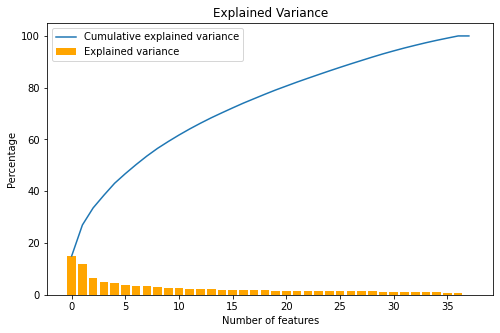

In [ ]:
v_ratio = pca1.explained_variance_ratio_ * 100
v_ratio_cum = v_ratio.cumsum()

threshold = 90

for idx, val in enumerate(v_ratio_cum, 1):
  if val > threshold:
    component_num = idx
    break

print(component_num, 'principal components captures at least 90% of the total variance in the dataset.\n')

plt.figure(figsize=(8,5))
plt.bar(range(N_COMPONENTS), v_ratio, label='Explained variance', color='orange')
plt.plot(range(N_COMPONENTS), v_ratio_cum, label='Cumulative explained variance')

plt.xlabel('Number of features')
plt.ylabel('Percentage')
plt.title('Explained Variance')
plt.legend()
plt.show()

Reduce the gene features from 7129 to the top 28 princial features


In [ ]:
N_COMPONENTS = component_num
pca2 = PCA(N_COMPONENTS)
train_pca = pd.DataFrame(pca2.fit_transform(train_x_scaled))
test_pca = pd.DataFrame(pca2.transform(test_x_scaled))
test_pca.index = test_y.index

# get selected params
# s = pca2.singular_values_
v = pca2.components_
# v_ratio = pca2.explained_variance_ratio_
# v_explained = pca2.explained_variance_

Percentage of variance explained by each of the selected components:
[14.99 11.98  6.6   4.88  4.63  3.72  3.49  3.29  2.99  2.65  2.51  2.36
  2.21  2.09  1.94  1.89  1.85  1.71  1.71  1.64  1.54  1.53  1.46  1.43
  1.42  1.38  1.35  1.31] 



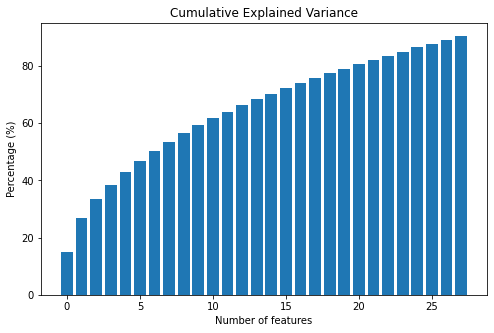

In [ ]:
v_ratio = pca2.explained_variance_ratio_ * 100
v_ratio_cum = v_ratio.cumsum()

print('Percentage of variance explained by each of the selected components:')
print(v_ratio.round(2), '\n')

plt.figure(figsize=(8,5))
plt.bar(range(component_num), v_ratio_cum, label='Cumulative explained variance')

plt.xlabel('Number of features')
plt.ylabel('Percentage (%)')
plt.title('Cumulative Explained Variance')
plt.show()

### **Component Makeup**

To examine the makeup of each PCA component based on the *weightings of the original features* that are included in the component. The components are ordered from smallest to largest.

The following code shows the feature-level makeup of the top three components.

In [ ]:
import seaborn as sns

def display_component(v, features_list, component_num, n_weights=10):
  
  # get index of component (last row - component_num)
  row_idx = N_COMPONENTS-component_num

  # get the list of weights from a row in v, dataframe
  v_1_row = v.iloc[row_idx, :]
  v_1 = np.squeeze(v_1_row.values)

  # match weights to features in counties_scaled dataframe, using list comporehension
  comps = pd.DataFrame(list(zip(v_1, features_list)), columns=['weights', 'features'])

  # sort by the largest n_weights
  # weights can be neg/pos, sort by magnitude
  comps['abs_weights'] = comps['weights'].apply(lambda x: np.abs(x))
  sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

  # display using seaborn
  ax = plt.subplots(figsize=(8,6))
  ax = sns.barplot(data=sorted_weight_data,
                    x='weights', y='features', palette='Blues_d')
  ax.set_title('PCA Component Makeup, Component #' + str(component_num))
  plt.show()

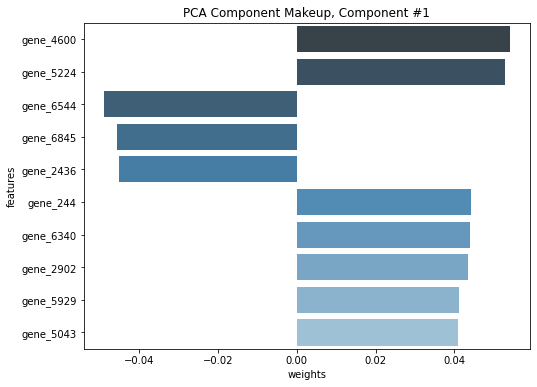

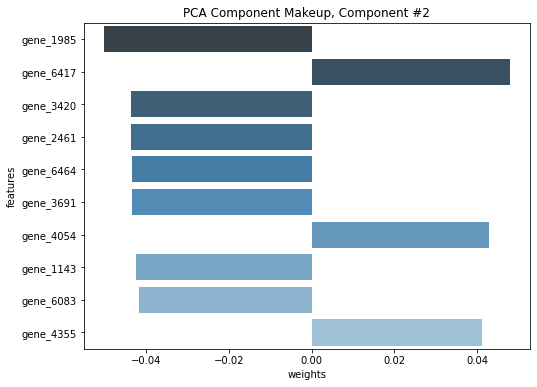

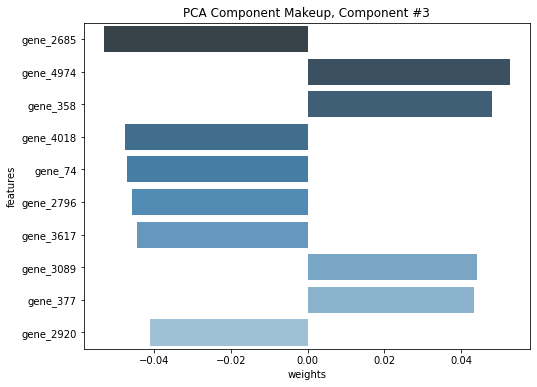

In [ ]:
# display the makeup of top three components
for num in range(1, 4):
  display_component(pd.DataFrame(v), train_x.columns.values, component_num=num, n_weights=10)

#### Explore 3D visualization

All gene dataset and training dataset are used to explore the distrubution in 3D coordinate.

In [ ]:
# reduce to 3 features - gene dataset
print('First 3 components captures {}% of the total variance.\n'.format(sum(v_ratio[:3]).round(2)))
pca3 = PCA(n_components=3)
gene_reduced_pca = pd.DataFrame(pca3.fit_transform(gene_scaled))

print('PCA reducted dataframe description:')
gene_reduced_pca.describe().round(2)

First 3 components captures 33.57% of the total variance.

PCA reducted dataframe description:


,0,1,2
count,72.00,72.00,72.00
mean,-0.00,0.00,0.00
std,32.84,26.13,18.37
min,-55.34,-36.78,-44.82
25%,-24.15,-17.27,-10.79
50%,-3.61,-5.95,-2.87
75%,20.49,8.03,8.80
max,91.38,115.30,52.06


Text(0.5, 0, 'z axis_3rd')

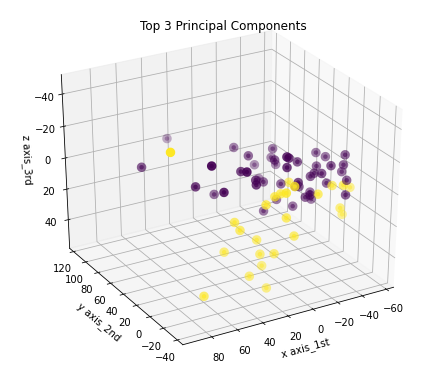

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualize in 3D
y = gene_data['cancer'].replace({'ALL':0,'AML':1})

# plt.clf()
fig = plt.figure(figsize=(6,5))
ax = Axes3D(fig, elev=-150, azim=120)
ax.scatter(gene_reduced_pca.iloc[:, 0], gene_reduced_pca.iloc[:, 1], gene_reduced_pca.iloc[:, 2],
           c = y, linewidths=5)

ax.set_title('Top 3 Principal Components')
ax.set_xlabel('x axis_1st')
ax.set_ylabel('y axis_2nd')
ax.set_zlabel('z axis_3rd')

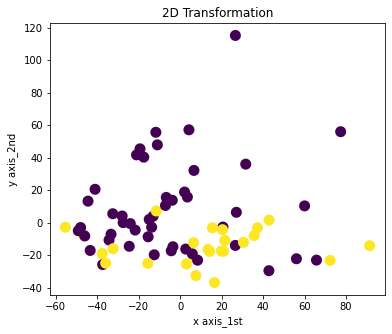

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(gene_reduced_pca.iloc[:, 0], gene_reduced_pca.iloc[:, 1], c = y, linewidths=5)
plt.title('2D Transformation')
plt.xlabel('x axis_1st')
plt.ylabel('y axis_2nd')
plt.show()

In [ ]:
# reduce to 3 features - training dataset
print('First 3 components captures {}% of the total variance.\n'.format(sum(v_ratio[:3]).round(2)))
pca3_ = PCA(n_components=3)
train_reduced_pca = pd.DataFrame(pca3_.fit_transform(train_x_scaled))

print('PCA reducted training dataframe description:')
train_reduced_pca.describe().round(2)

First 3 components captures 33.57% of the total variance.

PCA reducted training dataframe description:


,0,1,2
count,38.00,38.00,38.00
mean,0.00,-0.00,-0.00
std,33.13,29.61,21.98
min,-61.15,-35.15,-38.68
25%,-23.22,-20.29,-11.23
50%,-2.97,-8.49,-3.08
75%,18.27,11.00,8.64
max,74.84,112.45,49.41


Text(0.5, 0, 'z axis_3rd')

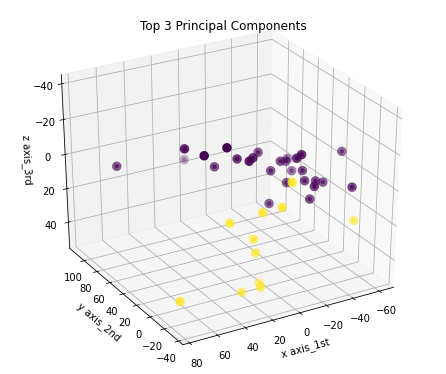

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualize in 3D

# plt.clf()
fig = plt.figure(figsize=(6,5))
ax = Axes3D(fig, elev=-150, azim=120)
ax.scatter(train_reduced_pca.iloc[:, 0], train_reduced_pca.iloc[:, 1], train_reduced_pca.iloc[:, 2],
           c=gene_data['cancer'][:38].replace({'ALL':0,'AML':1}), linewidths=5)

ax.set_title('Top 3 Principal Components')
ax.set_xlabel('x axis_1st')
ax.set_ylabel('y axis_2nd')
ax.set_zlabel('z axis_3rd')

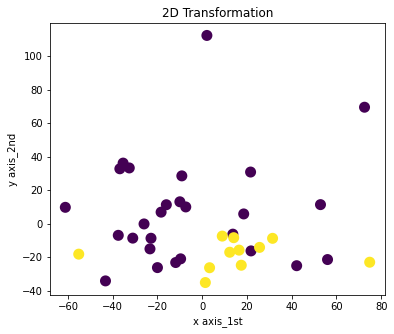

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(train_reduced_pca.iloc[:, 0], train_reduced_pca.iloc[:, 1], 
            c=gene_data['cancer'][:38].replace({'ALL':0,'AML':1}), linewidths=5)
plt.title('2D Transformation')
plt.xlabel('x axis_1st')
plt.ylabel('y axis_2nd')
plt.show()

### **Dimensionality Reduction - SageMaker PCA**

Use Amazon SageMaker PCA algorithm to reduce dimensionality of gene data.

PCA attempts to reduce the number of features within a dataset while retaining the “principal components”, which are defined as weighted, linear combinations of existing features that are designed to be linearly independent and account for the largest possible variability in the data!


In [ ]:
from sagemaker import get_execution_role

# store the current SageMaker session
session = sagemaker.Session() 

# get IAM role
role = get_execution_role()
print(role)

# get default bucket
bucket_name = session.default_bucket()
print(bucket_name)

**Define a PCA Model**

Use the built-in SageMaker resource to create a PCA model. A SageMaker estimator requires a number of parameters to be specified; these define the type of training instance to use and the model hyperparameters. A PCA model requires the following constructor arguments:

* role: The IAM role, which was specified above.
* train_instance_count: The number of training instances (typically, 1).
* train_instance_type: The type of SageMaker instance for training.
* num_components: An integer that defines the number of PCA components to produce.
* sagemaker_session: The session used to train on SageMaker.


In [ ]:
# define location to store model artifacts
prefix = 'genes'
output_path='s3://{}/{}/'.format(bucket_name, prefix)

print('Training artifacts will be uploaded to: {}'.format(output_path))

In [ ]:
# define a PCA model
from sagemaker import PCA

N_COMPONENTS = len(gene_scaled.columns) - 1

pca_SM = PCA(role=role,
             train_instance_count=1,
             train_instance_type='ml.c4.xlarge',
             output_path=output_path,
             num_components=N_COMPONENTS, 
             sagemaker_session=session)

**Convert data into a RecordSet format**

Next, prepare the data for a built-in model by converting the DataFrame to a numpy array of float values.

The `record_set` function in the SageMaker PCA model converts a numpy array into a RecordSet format that is the required format for the training input data.

In [ ]:
# convert df to np array
train_data_np = counties_scaled.values.astype('float32')

# convert to RecordSet format
formatted_train_data = pca_SM.record_set(train_data_np)

**Train the PCA model**

Call the fit function on the PCA model, passing in the formatted, training data.

In [ ]:
%%time

# train the PCA mode on the formatted data
pca_SM.fit(formatted_train_data)

### **Creating Final Data Files**

In [ ]:
make_csv(train_pca, train_y, filename='train_pca.csv', data_dir=data_dir)
make_csv(test_pca, test_y, filename='test_pca.csv', data_dir=data_dir)

Path created: gene_data/train.csv
Path created: gene_data/test.csv


---
## **Training Model**

**Read in Data**

In [ ]:
# data managing and display libs
import os
import io
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# read in data
data_dir = 'gene_data'

train_df = pd.read_csv(os.path.join(data_dir, 'train_pca.csv'), header=None, index_col=False)
test_df = pd.read_csv(os.path.join(data_dir, 'test_pca.csv'), header=None, index_col=False)

train_x = train_df.iloc[:, 1:]
train_y = train_df.iloc[:, :1]
test_x = test_df.iloc[:, 1:]
test_y = test_df.iloc[:, :1]

print('Read in PCA train and test data')

Read in train and test data


In [ ]:
gene_df = pd.read_csv(os.path.join(data_dir, 'gene_scaled.csv'), header=None, index_col=False)

train_x_scaled = gene_df.iloc[:38, 1:]
test_x_scaled = gene_df.iloc[38:, 1:]

print('Read in scaled train and test data')

Read in scaled train and test data


#### **Help Funtions**

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

def evaluate(predictor, y_true, scale_pred, y_pred, opt=False):

  print(predictor, 'Model Performance -')

  # performance of scaled data trained model
  if not opt:
    print('\nScaled Data - ')
  else:
    print('\nOriginal Model - ')
  print('AUC:', round(roc_auc_score(y_true, scale_pred), 2))
  print('Accuracy:', round(accuracy_score(y_true, scale_pred), 2))
  cm_s = confusion_matrix(y_true, scale_pred)

  # performance of PCA data trained model or optimized model
  if not opt:
    print('\nPCA Data - ')
  else:
    print('\nOptimized Model - ')
  print('AUC:', round(roc_auc_score(y_true, y_pred), 2))
  print('Accuracy:', round(accuracy_score(y_true, y_pred), 2))
  cm = confusion_matrix(y_true, y_pred)

  # plot_confusion_matrix
  fig, axs = plt.subplots(1, 2, figsize=(6, 4))
  fig.suptitle('Confusion Matrix', x= 0.15, y=1)
  plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=0.8, wspace=0.5)

  plot_confusion_matrix(cm_s, axs[0], labels=['ALL', 'AML'])
  plot_confusion_matrix(cm, axs[1], labels=['ALL', 'AML'])

  if not opt:
    axs[0].set_title('Scaled Data')
    axs[1].set_title('PCA Data')
  else:
    axs[0].set_title('Original Model')
    axs[1].set_title('Optimized Model')

In [ ]:
import seaborn as sns

def plot_confusion_matrix(cm, axs=None, labels=['ALL', 'AML']):

  # display using seaborn
  # ax = plt.subplots()
  ax = sns.heatmap(data=cm, annot=True, fmt='g', cmap='Blues', ax=axs)

  # labels, title and ticks
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels') 
  ax.xaxis.set_ticklabels(labels) 
  ax.yaxis.set_ticklabels(labels, rotation=360)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_model(x, y, estimator, param_grid, scoring=None, 
               n_jobs=None, refit=True, cv=None, verbose=0, 
               pre_dispatch='2*n_jobs', return_train_score=False):
  
  model = GridSearchCV(estimator, param_grid, scoring, n_jobs, refit, 
                       cv, verbose, pre_dispatch, return_train_score)
  model.fit(x, y)

  print("Best Parameters:", model.best_params_, '\n')

  return model.best_estimator_ 

### **Baseline**

A naive baseline is predicting all patients have 'ALL' type cancer.

Baseline Model Performance -
AUC: 0.5
Accuracy: 0.59


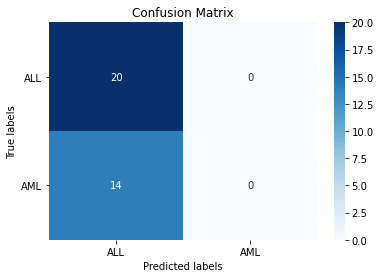

In [ ]:
y_true = np.array(test_y)

print('Baseline', 'Model Performance -')
print('AUC:', round(roc_auc_score(y_true, np.array([0]*34)), 2))
print('Accuracy:', round(accuracy_score(y_true, np.array([0]*34)), 2))

plot_confusion_matrix(confusion_matrix(y_true, np.array([0]*34)))

### **K-Means Clustering**

Unsupervised clustering approach to separate samples in two groups.

K-Means Clustering Model Performance -

Scaled Data - 
AUC: 0.72
Accuracy: 0.76

PCA Data - 
AUC: 0.71
Accuracy: 0.74


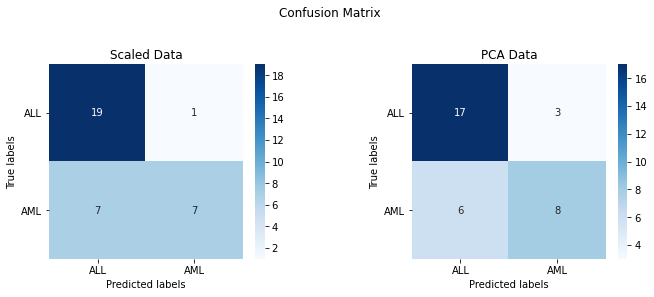

In [ ]:
from sklearn.cluster import KMeans

kmeans_s = KMeans(n_clusters=2, random_state=10)
kmeans_s.fit(train_x_scaled)
kmeans_s_pred = kmeans_s.predict(test_x_scaled)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(train_x)
kmeans_pred = kmeans.predict(test_x)

evaluate('K-Means Clustering', y_true, kmeans_s_pred, kmeans_pred)

### **Naive Bayes**

`GaussianNB` implements the Gaussian Naive Bayes algorithm for classification.

Gaussian Naive Bayes Classifier Model Performance -

Scaled Data - 
AUC: 0.91
Accuracy: 0.91

PCA Data - 
AUC: 0.57
Accuracy: 0.65


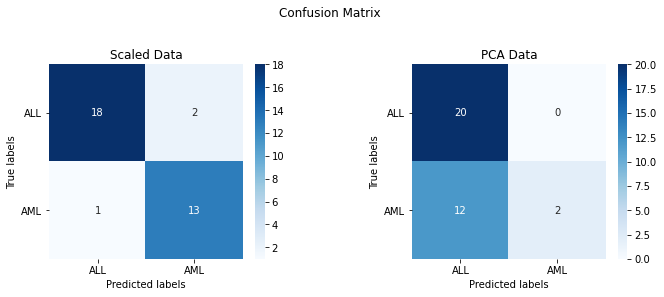

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussianNB_s = GaussianNB()
gaussianNB_s.fit(train_x_scaled, train_y[0])
nb_s_pred = gaussianNB_s.predict(test_x_scaled)

gaussianNB = GaussianNB()
gaussianNB.fit(train_x, train_y[0])
nb_pred = gaussianNB.predict(test_x)

evaluate('Gaussian Naive Bayes Classifier', y_true, nb_s_pred, nb_pred)

### **Nearest Neighbors Classifer**

`KNeighborsClassifier` implements the k-nearest neighbors vote for classification.

K-Nearest Neighbors Classifier Model Performance -

Scaled Data - 
AUC: 0.62
Accuracy: 0.68

PCA Data - 
AUC: 0.57
Accuracy: 0.65


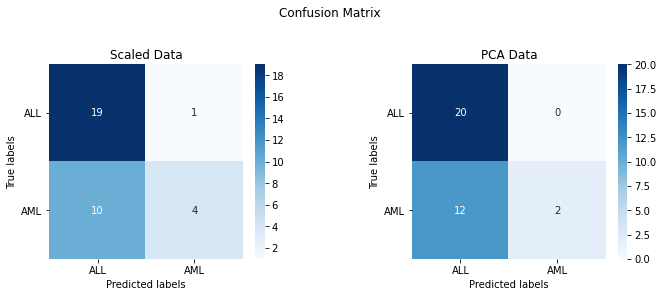

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_s = KNeighborsClassifier(n_neighbors=2)
knn_s.fit(train_x_scaled, train_y[0])
knn_s_pred = knn_s.predict(test_x_scaled)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_x, train_y[0])
knn_pred = knn.predict(test_x)

evaluate('K-Nearest Neighbors Classifier', y_true, knn_s_pred, knn_pred)

#### **Model Tuning**
Grid search cross-validation tuning is used to try and determine the best hyperparameters.

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} 

K-Nearest Neighbors Classifier Model Performance -

Original Model - 
AUC: 0.62
Accuracy: 0.68

Optimized Model - 
AUC: 0.72
Accuracy: 0.76


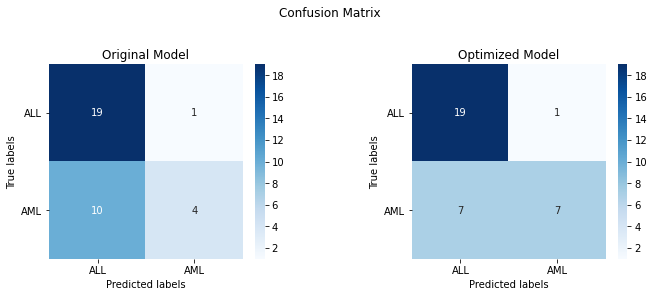

In [ ]:
knn_estimator = KNeighborsClassifier(n_neighbors=2)
knn_params = {'n_neighbors': [i for i in range(1, 30, 5)], 
              'weights': ['uniform', 'distance'], 
              'algorithm': ['ball_tree', 'kd_tree', 'brute'], 
              'leaf_size': [1, 10, 30], 
              'p': [1, 2]}
knn_best_model = tune_model(train_x_scaled, train_y[0], knn_estimator, knn_params)
knn_o_pred = knn_best_model.predict(test_x_scaled)

evaluate('K-Nearest Neighbors Classifier', y_true, knn_s_pred, knn_o_pred, opt=True)

### **Logistic Regression Classifer**

`LogisticRegression` implements regularized logistic regression using the ‘liblinear’ library. Regularization is applied by default.


Logistic Regression Classifier Model Performance -

Scaled Data - 
AUC: 0.79
Accuracy: 0.82

PCA Data - 
AUC: 0.75
Accuracy: 0.79


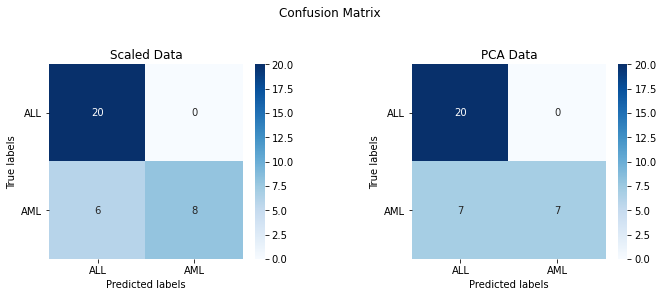

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_s = LogisticRegression(random_state=0)
logit_s.fit(train_x_scaled, train_y[0])
logit_s_pred = logit_s.predict(test_x_scaled)

logit = LogisticRegression(random_state=0)
logit.fit(train_x, train_y[0])
logit_pred = logit.predict(test_x)

evaluate('Logistic Regression Classifier', y_true, logit_s_pred, logit_pred)

#### **Model Tuning**
Grid search cross-validation tuning is used to try and determine the best hyperparameters.

Best Parameters: {'C': 1, 'penalty': 'l1'} 

Logistic Regression Classifier Model Performance -

Original Model - 
AUC: 0.79
Accuracy: 0.82

Optimized Model - 
AUC: 0.89
Accuracy: 0.91


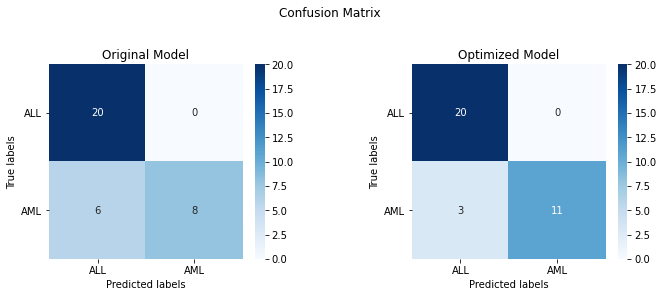

In [ ]:
logit_estimator = LogisticRegression(solver='liblinear')
logit_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
logit_best_model = tune_model(train_x_scaled, train_y[0], logit_estimator, logit_params)
logit_o_pred = logit_best_model.predict(test_x_scaled)

evaluate('Logistic Regression Classifier', y_true, logit_s_pred, logit_o_pred, opt=True)

### **Support Vector Machine**

`SVC` implements C-Support Vector Classification based on libsvm.

C-Support Vector Classifier Model Performance -

Scaled Data - 
AUC: 0.54
Accuracy: 0.62

PCA Data - 
AUC: 0.71
Accuracy: 0.76


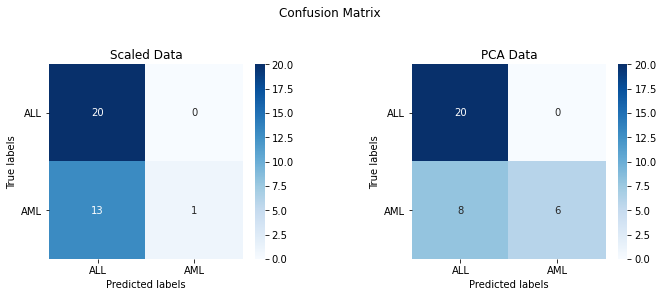

In [ ]:
from sklearn.svm import SVC

svc_s = SVC()
svc_s.fit(train_x_scaled, train_y[0])
svc_s_pred = svc_s.predict(test_x_scaled)

svc = SVC()
svc.fit(train_x, train_y[0])
svc_pred = svc.predict(test_x)

evaluate('C-Support Vector Classifier', y_true, svc_s_pred, svc_pred)

#### **Model Tuning**
Grid search cross-validation tuning is used to try and determine the best hyperparameters.

Best Parameters: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'linear'} 

C-Support Vector Classifier Model Performance -

Original Model - 
AUC: 0.71
Accuracy: 0.76

Optimized Model - 
AUC: 0.89
Accuracy: 0.91


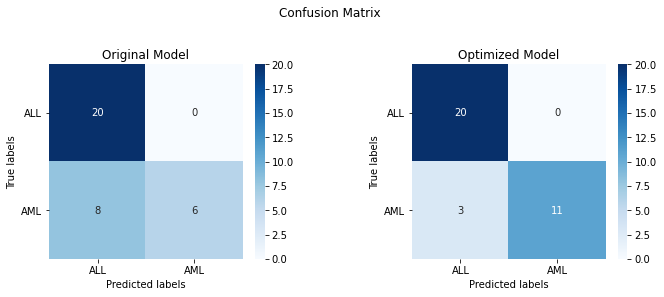

In [ ]:
svc_estimator = SVC()
svc_params = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10], 
              'kernel': ['linear', 'poly', 'rbf'], 
              'decision_function_shape' : ['ovo', 'ovr']}
svc_best_model = tune_model(train_x_scaled, train_y[0], svc_estimator, svc_params)
svc_o_pred = svc_best_model.predict(test_x_scaled)

evaluate('C-Support Vector Classifier', y_true, svc_pred, svc_o_pred, opt=True)

### **Gradient Boosting Classifer.**

`GradientBoostingClassifier` implements the gradient boosting models XGBoost(XGB) for classification.

Gradient Boosting Classifier Model Performance -

Scaled Data - 
AUC: 0.91
Accuracy: 0.91

PCA Data - 
AUC: 0.64
Accuracy: 0.71


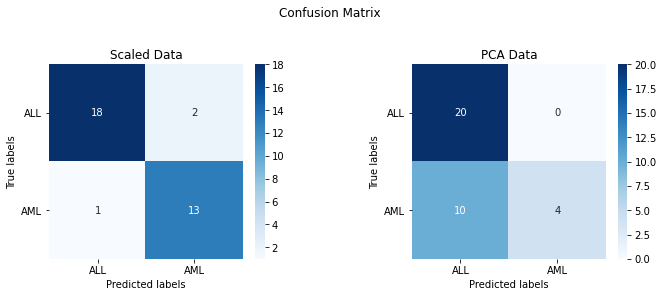

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as XGB

xgb_s = XGB(random_state=0, max_depth=20, loss='exponential', n_estimators=100, learning_rate=0.02)
xgb_s.fit(train_x_scaled, train_y[0])
xgb_s_pred = xgb_s.predict(test_x_scaled)

xgb = XGB(random_state=0, max_depth=20, loss='exponential', n_estimators=100, learning_rate=0.02)
xgb.fit(train_x, train_y[0])
xgb_pred = xgb.predict(test_x)

evaluate('Gradient Boosting Classifier', y_true, xgb_s_pred, xgb_pred)

#### **Model Tuning**
Grid search cross-validation tuning is used to try and determine the best hyperparameters.

In [ ]:
xgb_estimator = XGB(random_state=0)
xgb_params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, 12], 
              'loss': ['deviance', 'exponential'], 
              'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130], 
              'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}
xgb_best_model = tune_model(train_x_scaled, train_y[0], xgb_estimator, xgb_params)
xgb_o_pred = xgb_best_model.predict(test_x_scaled)

evaluate('Gradient Boosting Classifier', y_true, xgb_s_pred, xgb_o_pred, opt=True)

### XGBoost Python Package

Gradient Boosting Classifier (Python Package) Model Performance -

Scaled Data - 
AUC: 0.91
Accuracy: 0.91

PCA Data - 
AUC: 0.61
Accuracy: 0.68


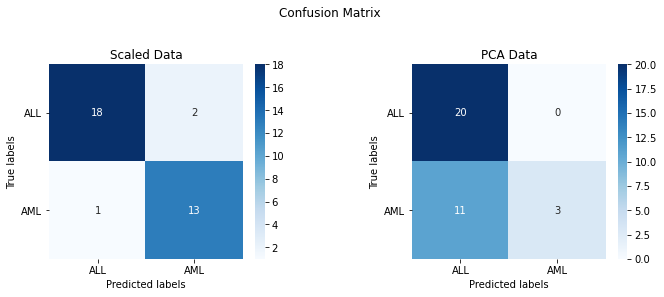

In [ ]:
import xgboost as XGBoost

xgb2_s = XGBoost.XGBClassifier(random_state=0)
xgb2_s.fit(train_x_scaled, train_y[0])
xgb2_s_pred = xgb2_s.predict(test_x_scaled)

xgb2 = XGBoost.XGBClassifier(random_state=0)
xgb2.fit(train_x, train_y[0])
xgb2_pred = xgb2.predict(test_x)

evaluate('Gradient Boosting Classifier (Python Package)', y_true, xgb2_s_pred, xgb2_pred)

#### **Model Tuning**
Grid search cross-validation tuning is used to try and determine the best hyperparameters.

In [ ]:
xgb2_estimator = XGBoost.XGBClassifier(random_state=0, n_jobs=-1)
xgb2_params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, 12], 
              'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15], 
              'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130], 
              'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}
xgb2_best_model = tune_model(train_x_scaled, train_y[0], xgb2_estimator, xgb2_params, 
                             scoring='accuracy', cv=3)
xgb2_o_pred = xgb2_best_model.predict(test_x_scaled)

evaluate('Gradient Boosting Classifier (Python Package)', y_true, xgb2_s_pred, xgb2_o_pred, opt=True)

Best Parameters:
 {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50} 

Gradient Boosting Classifier Model Performance -
AUC: 0.72
Accuracy: 0.76


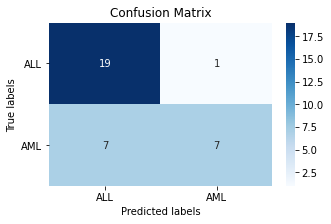

In [ ]:
xgb2_params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
               'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15],
               'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
               'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}

fixed_params = {'random_state': 0, 'n_jobs': -1}
xgb2_estimator = XGBoost.XGBClassifier(**fixed_params)

xgb2_tune = GridSearchCV(xgb2_estimator, param_grid=xgb2_params, scoring='accuracy', cv=3)
xgb2_tune.fit(train_x_scaled, train_y[0])

print('Best Parameters:', xgb2_tune.best_params_, '\n')
xgb2_best_model = xgb2_tune.best_estimator_

xgb2_o_pred = xgb2_best_model.predict(test_x_scaled)

display_performance('Gradient Boosting Classifier', y_true, xgb2_o_pred)